In [4]:
!pip install --user contractions

In [5]:
%pip install contractions

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import sys
sys.executable

'C:\\ProgramData\\anaconda3\\python.exe'

In [7]:
!pip install pyPDF2

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install pdfplumber

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip install pdfReader

Defaulting to user installation because normal site-packages is not writeable


In [10]:
import pandas as pd
import numpy as np
import re
import string # for text cleaning
import contractions # for expanding short form words
from tqdm import tqdm
tqdm.pandas(desc="Progress Bar")
import matplotlib.pyplot as plt
import os
import PyPDF2
import pdfplumber
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
resumes = pd.read_csv("C:\\Users\\pc\\Downloads\\Chapitre 1\\data\\resume_dataset.csv")
resumes.head()

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [12]:
def text_cleaning(text:str) -> str:
    if pd.isnull(text):
        return

    # lower-case everything
    text = text.lower().strip()

    # For removing puctuations
    translator = str.maketrans('', '', string.punctuation)

    # expand all the short-form words
    text = contractions.fix(text)

    # remove any special chars
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # Remove URLs
    text = re.sub(r'\S+@\S+', '', text) # Remove emails
    text = re.sub(r'\b\d{1,3}[-./]?\d{1,3}[-./]?\d{1,4}\b', '', text) # Remove phone numbers
    text = text.translate(translator) # Remove puctuations
    text = re.sub(r'[^a-zA-Z]', ' ', text) # Remove other non-alphanumeric characters

    return text.strip()

In [13]:
resumes['Resume'] = resumes['Resume'].progress_apply(text_cleaning)
resumes.head()

Progress Bar: 100%|██████████| 1219/1219 [00:08<00:00, 147.78it/s]


,ID,Category,Resume
0,1,HR,bjohn h smith phrn po box callahan fl ...
1,2,HR,bname surnamenaddressnmobile noemailnpersonal ...
2,3,HR,banthony brownnhr assistantnareas of expertise...
3,4,HR,b idncareer objectivento pursue a growth orien...
4,5,HR,bhuman resources directornxefx xb expert in o...


In [14]:
resumes.duplicated(subset=['Resume']).value_counts()

False    1091
True      128
Name: count, dtype: int64

In [15]:
resumes.drop_duplicates(subset=['Resume'], keep='first',inplace = True)
resumes.reset_index(inplace=True,drop=True)
resumes.head()

,ID,Category,Resume
0,1,HR,bjohn h smith phrn po box callahan fl ...
1,2,HR,bname surnamenaddressnmobile noemailnpersonal ...
2,3,HR,banthony brownnhr assistantnareas of expertise...
3,4,HR,b idncareer objectivento pursue a growth orien...
4,5,HR,bhuman resources directornxefx xb expert in o...


In [16]:
resumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1091 non-null   int64 
 1   Category  1091 non-null   object
 2   Resume    1091 non-null   object
dtypes: int64(1), object(2)
memory usage: 25.7+ KB


In [17]:
resumes["Category"].value_counts()

Category
Information Technology     100
Engineering                 90
Education                   80
Managment                   71
Health & Fitness            69
Sales                       60
Accountant                  60
Finance                     59
Advocate                    51
Designing                   51
Banking                     48
Digital Media               47
Business Development        43
Arts                        41
HR                          36
Automobile                  26
Consultant                  25
Building & Construction     25
Agricultural                24
BPO                         23
Food & Beverages            22
Aviation                    12
Public Relations            11
Architects                  10
Apparel                      7
Name: count, dtype: int64

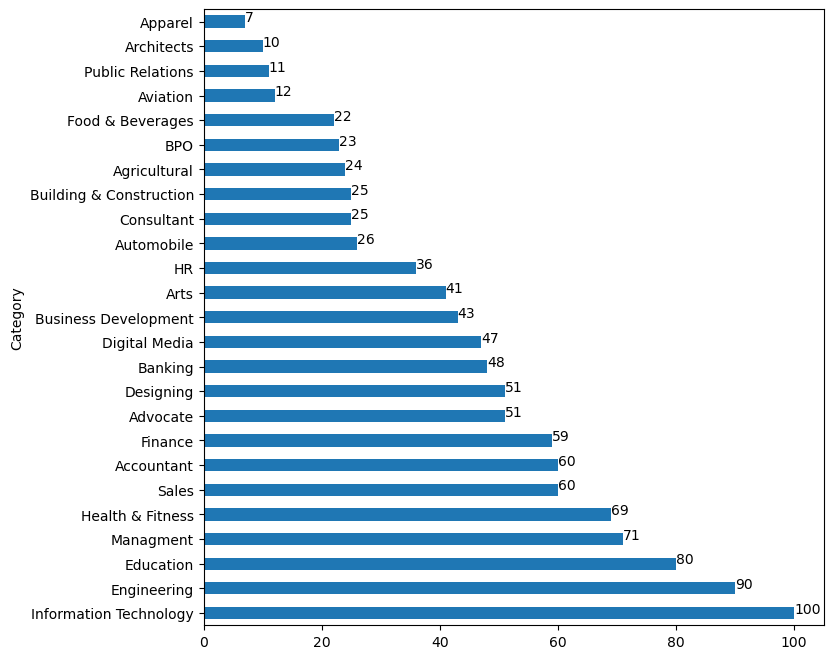

In [18]:
# We can see here the distribution of different CV categories

plt.figure(figsize=(8,8))

resumes.Category.value_counts().plot(kind='barh')

for index, value in enumerate(resumes.Category.value_counts().values):
    plt.text(value, index, str(value))

plt.show();

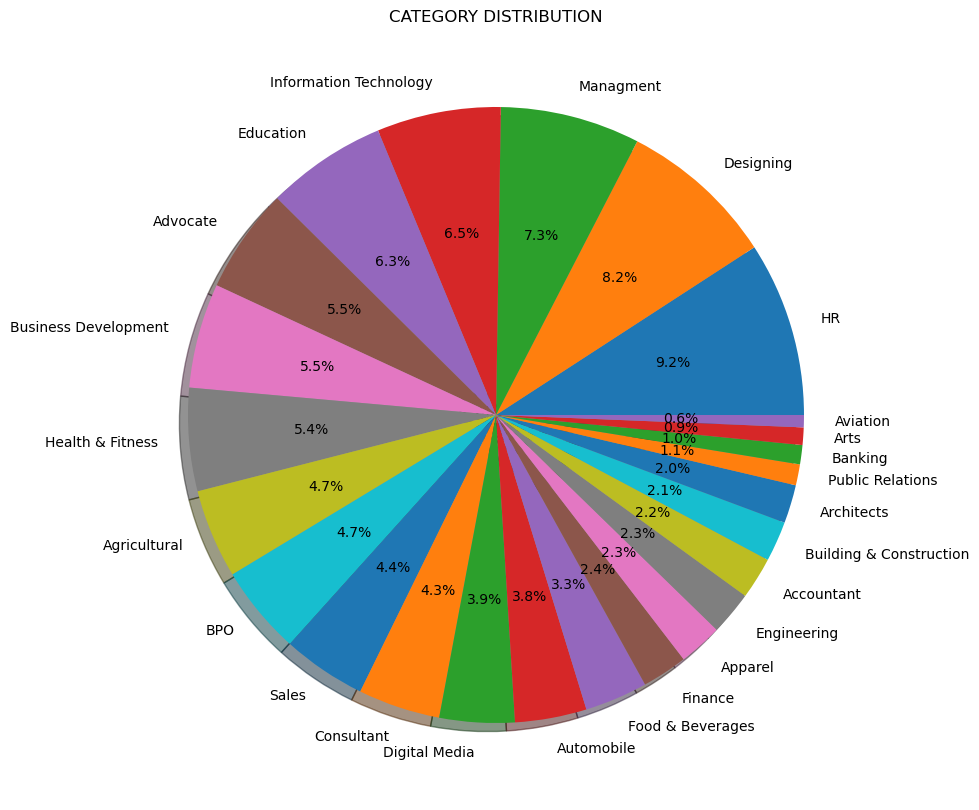

In [19]:
from matplotlib.gridspec import GridSpec
targetCounts = resumes['Category'].value_counts()
targetLabels  = resumes['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [20]:
Information_Technology="C:\\Users\\pc\\Downloads\\Information-Technology-Spoecialist-job-description.pdf"

In [21]:
Information_Technology_File = open(Information_Technology, 'rb')
Script = PyPDF2.PdfReader(Information_Technology_File)
pages = len(Script.pages)

In [22]:
Script_Information_Technology = []
with pdfplumber.open(Information_Technology_File) as pdf:
    for i in range (0,pages):
        page=pdf.pages[i]
        text=page.extract_text()
        print (text)
        Script_Information_Technology.append(text)


Information Technology Specialist - Job Description
Title: Information Technology Specialist
Reports To: Operations Manager
Immediate Direct Reports: none
Scope: In Scope
Summary
Reporting to the Operation Manager, the Information Technology Specialist is responsible for the
effective operation of information technology (IT) services and support across the organization.
The Information Technology Specialist serves as a technical expert for the development,
implementation, management, and support of systems and networks. The IT specialist plans and
carries out exciting, complex assignments and develops new methods and approaches in a wide
variety of IT specialties. They evaluate new and enhanced approaches to deliver IT services;
test and optimize the functionality of systems, networks, and data; and define technical
requirements. The Information Technology Specialist is responsible for providing various forms
of computer-related technical assistance and improving the efficiency of the 

In [33]:
Script_Information_Technology=''.join(Script_Information_Technology)
Information_Technology_Clear=Script_Information_Technology.replace("\n","")
Information_Technology_Clear

"Information Technology Specialist - Job DescriptionTitle: Information Technology SpecialistReports To: Operations ManagerImmediate Direct Reports: noneScope: In ScopeSummaryReporting to the Operation Manager, the Information Technology Specialist is responsible for theeffective operation of information technology (IT) services and support across the organization.The Information Technology Specialist serves as a technical expert for the development,implementation, management, and support of systems and networks. The IT specialist plans andcarries out exciting, complex assignments and develops new methods and approaches in a widevariety of IT specialties. They evaluate new and enhanced approaches to deliver IT services;test and optimize the functionality of systems, networks, and data; and define technicalrequirements. The Information Technology Specialist is responsible for providing various formsof computer-related technical assistance and improving the efficiency of the work of the s

In [37]:
# Filtrer les CVs de la catégorie "Information Technology"
it_resumes = resumes[resumes['Category'] == 'Information Technology']

# Liste pour stocker le texte des CVs
it_resumes_text = it_resumes['Resume'].tolist()
it_resumes_text

['bresumenajitha shenoy kbnphd student computer sciencenroom no cs ndepartment of computer scienceniit kanpurnup indianemail    or          xe x  x    rnncareer objective to pursue a challenging career and be part of a progressivenorganization that gives scope to enhance my knowledge skills and to reach the pinnaclenin the computing and research field with sheer determination dedication and hard worknnwork experiencenxefx  xacnnxefx  xb nxefx  xb nnpursuing research in the department of computer science and engineeringnat iit kanpurnworked as a lecturer in the department of information  communicationntechnology at manipal institute of technology manipal from  ton      years   monthsn   years of work experience as a lecturer in the department of mathematics atngovernment college kasaragod xe x  x    nnprojects  work donen  mtech projectnnxe x  x ctcp switchingxe x  x dntechnology used c linuxnresponsibility my responsibilities were to code and to documentnproject description using circu

In [36]:

cv = CountVectorizer()

ranking_list = []

# Boucle pour calculer la similarité cosinus entre chaque CV et la description de poste
for resume_text in it_resumes_text:
    text = [resume_text, Information_Technology_Clear]
    count_matrix = cv.fit_transform(text)
    similarity_score = cosine_similarity(count_matrix)[0][1] * 100
    ranking_list.append(similarity_score)

# Ajouter la colonne 'ID' pour récupérer l'ID original de chaque CV
resume_ids = it_resumes['ID'].tolist()  # Assurez-vous que la colonne 'ID' existe dans le CSV

# Classement des CVs selon leur score de similarité avec l'ID original
ranked_resumes = sorted(zip(resume_ids, ranking_list), key=lambda x: -x[1])

# Affichage du classement avec l'ID original
for cv_id, score in ranked_resumes:
    print(f"CV ID: {cv_id}, Similarity Score: {score:.2f}")


CV ID: 254, Similarity Score: 80.40
CV ID: 187, Similarity Score: 79.55
CV ID: 220, Similarity Score: 77.66
CV ID: 176, Similarity Score: 77.43
CV ID: 223, Similarity Score: 75.30
CV ID: 229, Similarity Score: 75.20
CV ID: 256, Similarity Score: 74.03
CV ID: 204, Similarity Score: 73.88
CV ID: 232, Similarity Score: 73.80
CV ID: 268, Similarity Score: 73.01
CV ID: 216, Similarity Score: 72.78
CV ID: 263, Similarity Score: 72.68
CV ID: 240, Similarity Score: 72.44
CV ID: 255, Similarity Score: 71.09
CV ID: 198, Similarity Score: 70.79
CV ID: 224, Similarity Score: 70.59
CV ID: 266, Similarity Score: 68.97
CV ID: 259, Similarity Score: 68.82
CV ID: 181, Similarity Score: 68.64
CV ID: 265, Similarity Score: 68.07
CV ID: 214, Similarity Score: 67.72
CV ID: 226, Similarity Score: 67.25
CV ID: 167, Similarity Score: 66.35
CV ID: 203, Similarity Score: 66.26
CV ID: 185, Similarity Score: 65.72
CV ID: 231, Similarity Score: 65.57
CV ID: 188, Similarity Score: 65.54
CV ID: 249, Similarity Score

In [38]:
# Liste des 5 premiers IDs (ceux que tu as mentionnés)
top_5_ids = [254, 187, 220, 176, 223]

# Filtrer le DataFrame pour obtenir les CV correspondant aux 5 premiers IDs
top_5_resumes = resumes[resumes['ID'].isin(top_5_ids)]

# Afficher les CV correspondants
for index, row in top_5_resumes.iterrows():
    print(f"CV ID: {row['ID']}\n")
    print(row['Resume'])  # Affiche le texte du CV
    print("\n" + "="*50 + "\n")

CV ID: 176

bgary whitenphp developernareas of expertisencommercial experiencenweb developing nprogrammingnphp mvc frameworksncms implementationnwordpress joomla etcnnpersonal summaryna highly resourceful innovative and competent php developer with extensivenexperience in the layout design and coding of websites specifically in php formatnpossessing considerable knowledge of the development of web applications andnscripts using php programming language and mysql  sql server databasesnexperienced in developing applications and solutions for a wide range of corporatencharity and public sector clients and having the enthusiasm and ambition toncomplete projects to the highest standardnlooking for a suitable developer position with a ambitious  exciting companynnwork experiencenserver administrationnobject orientatednprogrammingnsoftware graphicsnmanipulationnnprofessionalnict professional systems and principlesn city  guildsnnpersonal skillsntime managementngoals orientatednability to gras

In [39]:
from sklearn.metrics import ndcg_score

# Scores de similarité des CV (remplace avec tes scores réels)
scores = [80.40, 79.55, 77.66, 77.43, 75.30]

# Relevance en fonction des positions des CVs
relevance = [1, 0, 1, 0, 1]  # Exemples de pertinence pour chaque CV

# Le score ndcg nécessite que les listes soient 2D
true_relevance = np.array([relevance])
predicted_scores = np.array([scores])

ndcg = ndcg_score(true_relevance, predicted_scores)
print(f"NDCG: {ndcg:.4f}")


NDCG: 0.8855


In [47]:
def calculate_mrr(relevance):
    for i, rel in enumerate(relevance):
        if rel == 1:
            return 1 / (i + 1)
    return 0

# Exemple : Liste de pertinence (1 si le CV est pertinent, 0 sinon)
relevance = [1, 0, 1, 0, 1]  # Par exemple, le 1er et le 3ème CV sont pertinents
mrr = calculate_mrr(relevance)
print(f"MRR: {mrr:.4f}")


MRR: 1.0000


In [48]:


# Exemple de données
ranked_resumes = [254, 187, 220, 176, 223, 229]  # IDs des CV classés par ordre de pertinence décroissante
relevance = [1, 0, 1, 0, 1, 1]  # Liste binaire de pertinence (1 si pertinent, 0 sinon)

def precision_at_k(y_true, y_pred, k):
    """
    Calcul de la précision à k.
    :param y_true: Liste des valeurs de vérité terrain (1 pour pertinent, 0 sinon).
    :param y_pred: Liste des valeurs prédites (les CVs classés par ordre de pertinence).
    :param k: Nombre de résultats à considérer pour la précision.
    :return: Précision à k.
    """
    y_true_at_k = y_true[:k]  # Prendre les k premiers résultats
    return np.mean(y_true_at_k)  # Précision à k

def recall_at_k(y_true, y_pred, k):
    """
    Calcul du rappel à k.
    :param y_true: Liste des valeurs de vérité terrain (1 pour pertinent, 0 sinon).
    :param y_pred: Liste des valeurs prédites (les CVs classés par ordre de pertinence).
    :param k: Nombre de résultats à considérer pour le rappel.
    :return: Rappel à k.
    """
    relevant_items = sum(y_true)  # Nombre total d'éléments pertinents
    if relevant_items == 0:
        return 0  # Éviter la division par zéro
    y_true_at_k = y_true[:k]  # Prendre les k premiers résultats
    return sum(y_true_at_k) / relevant_items  # Rappel à k

# Exemple d'utilisation
k = 5  # Nombre de résultats à considérer pour Precision@k et Recall@k
precision = precision_at_k(relevance, ranked_resumes, k)
recall = recall_at_k(relevance, ranked_resumes, k)

print(f"Precision@{k}: {precision:.4f}")
print(f"Recall@{k}: {recall:.4f}")


Precision@5: 0.6000
Recall@5: 0.7500


In [50]:
import numpy as np

# Exemple de données
ranked_resumes = [254, 187, 220, 176, 223]  # IDs des CV classés par ordre de pertinence décroissante
relevance = [1, 0, 1, 0, 1]  # Liste binaire de pertinence (1 si pertinent, 0 sinon)

def precision_at_k(y_true, y_pred, k):
    """
    Calcul de la précision à k.
    :param y_true: Liste des valeurs de vérité terrain (1 pour pertinent, 0 sinon).
    :param y_pred: Liste des valeurs prédites (les CVs classés par ordre de pertinence).
    :param k: Nombre de résultats à considérer pour la précision.
    :return: Précision à k.
    """
    y_true_at_k = y_true[:k]  # Prendre les k premiers résultats
    return np.mean(y_true_at_k)  # Précision à k

def recall_at_k(y_true, y_pred, k):
    """
    Calcul du rappel à k.
    :param y_true: Liste des valeurs de vérité terrain (1 pour pertinent, 0 sinon).
    :param y_pred: Liste des valeurs prédites (les CVs classés par ordre de pertinence).
    :param k: Nombre de résultats à considérer pour le rappel.
    :return: Rappel à k.
    """
    relevant_items = sum(y_true)  # Nombre total d'éléments pertinents
    if relevant_items == 0:
        return 0  # Éviter la division par zéro
    y_true_at_k = y_true[:k]  # Prendre les k premiers résultats
    return sum(y_true_at_k) / relevant_items  # Rappel à k

# Exemple d'utilisation
k = 5  # Nombre de résultats à considérer pour Precision@k et Recall@k
precision = precision_at_k(relevance, ranked_resumes, k)
recall = recall_at_k(relevance, ranked_resumes, k)

print(f"Precision@{k}: {precision:.4f}")
print(f"Recall@{k}: {recall:.4f}")


Precision@5: 0.6000
Recall@5: 1.0000
